# Hypergrid Example

## Importing and initializing environment

In [ ]:
from gfn.gym import HyperGrid
from gfn.utils.modules import MLP
from gfn.preprocessors import KHotPreprocessor
from gfn.modules import DiscretePolicyEstimator
from src.gflownet import TBGFlowNetV2
from src.algos import train_tb, train_lggfn, train_sagfn, train_subtb
from src.utils.hypergrid import plot_distribution, l1_error


env = HyperGrid(height=64, R0=1e-4, R1=1, R2=3, calculate_all_states=True)
preprocessor = KHotPreprocessor(height=env.height, ndim=env.ndim)

/Users/idriss.malek/Documents/GitHub/Loss-Guided-GFN/mrna/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


calculated tensor of all states in 0.0005669991175333658 minutes
+ Environment has 4096 states


/Users/idriss.malek/Documents/GitHub/Loss-Guided-GFN/torchgfn/src/gfn/env.py:385: UserWarning: You're using advanced parameters: (sf). These are only needed for custom action handling. For basic environments, you can omit these.
  warnings.warn(


## Training On Policy

In [2]:
mainPF_TB = MLP(input_dim=preprocessor.output_dim, output_dim=env.n_actions)

mainPB_TB = MLP(
    input_dim=preprocessor.output_dim,
    output_dim=env.n_actions - 1,
    trunk=mainPF_TB.trunk,
)

mainPF_estimator_TB = DiscretePolicyEstimator(
    mainPF_TB, env.n_actions, is_backward=False, preprocessor=preprocessor
)
mainPB_estimator_TB = DiscretePolicyEstimator(
    mainPB_TB, env.n_actions, is_backward=True, preprocessor=preprocessor
)

mainGFN_TB = TBGFlowNetV2(pf=mainPF_estimator_TB, pb=mainPB_estimator_TB, logZ=0.)

train_subtb(
    env=env,
    mainGFN=mainGFN_TB,
    batch_size=16,
    iterations=10000,
)

100%|██████████| 10000/10000 [05:35<00:00, 29.83it/s]


[8.0339994430542,
 5.488786697387695,
 7.968035697937012,
 8.040886878967285,
 15.400354385375977,
 14.820289611816406,
 11.965585708618164,
 8.585853576660156,
 4.88737678527832,
 10.927587509155273,
 10.972997665405273,
 13.901652336120605,
 12.862489700317383,
 10.00261402130127,
 15.444114685058594,
 13.178089141845703,
 9.728799819946289,
 10.081618309020996,
 11.839129447937012,
 16.32525634765625,
 11.902162551879883,
 12.942316055297852,
 11.525561332702637,
 15.171232223510742,
 14.291040420532227,
 10.645591735839844,
 12.611113548278809,
 23.610782623291016,
 11.380008697509766,
 13.463101387023926,
 12.91639232635498,
 15.984046936035156,
 19.085548400878906,
 12.300479888916016,
 12.637765884399414,
 20.50568389892578,
 19.5698299407959,
 16.103525161743164,
 15.396232604980469,
 19.037128448486328,
 18.15865707397461,
 16.125812530517578,
 12.737279891967773,
 18.985553741455078,
 12.383432388305664,
 27.139915466308594,
 18.024930953979492,
 18.88634490966797,
 13.861888

L1 error: 0.0003662258645593373


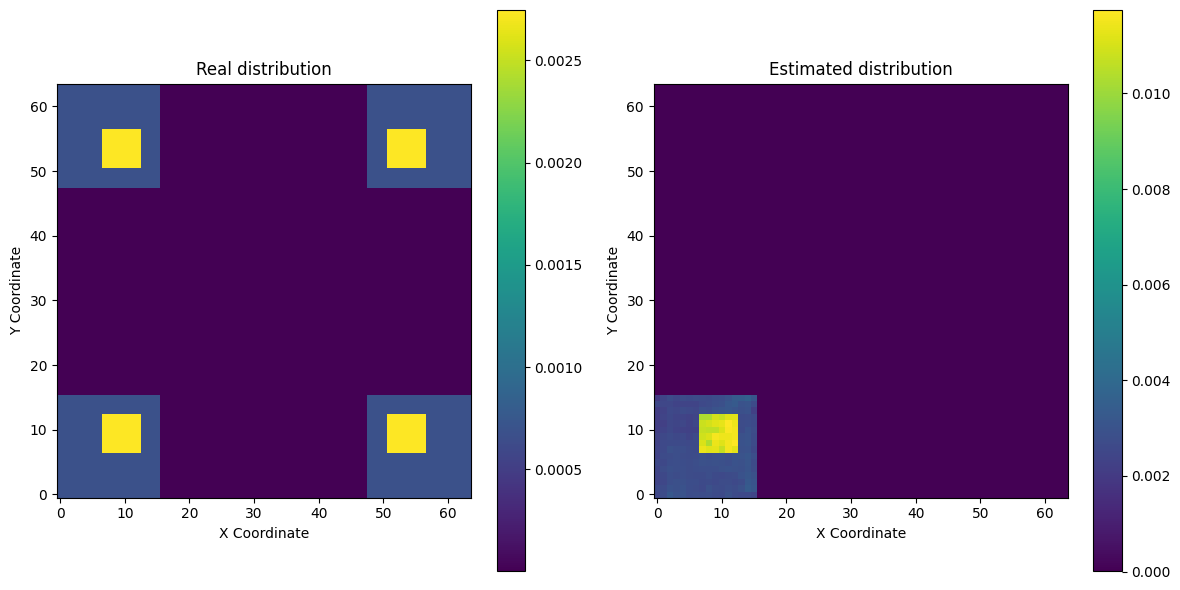

In [3]:
print("L1 error:", l1_error(mainGFN_TB.pf,env))
plot_distribution(mainGFN_TB.pf,env)

## Training with SAGFN

In [ ]:
mainPF_SAGFN = MLP(input_dim=preprocessor.output_dim, output_dim=env.n_actions)
mainPB_SAGFN = MLP(
    input_dim=preprocessor.output_dim,
    output_dim=env.n_actions - 1,
    trunk=mainPF_SAGFN.trunk,
)



mainPF_estimator_SAGFN = DiscretePolicyEstimator(
    mainPF_SAGFN, env.n_actions, is_backward=False, preprocessor=preprocessor
)
mainPB_estimator_SAGFN = DiscretePolicyEstimator(
    mainPB_SAGFN, env.n_actions, is_backward=True, preprocessor=preprocessor
)

mainGFN_SAGFN = TBGFlowNetV2(pf=mainPF_estimator_SAGFN, pb=mainPB_estimator_SAGFN, logZ=0.)

auxPF_SAGFN = MLP(input_dim=preprocessor.output_dim, output_dim=env.n_actions)
auxPB_SAGFN = MLP(
    input_dim=preprocessor.output_dim,
    output_dim=env.n_actions - 1,
    trunk=auxPF_SAGFN.trunk,
)



auxPF_estimator_SAGFN = DiscretePolicyEstimator(
    auxPF_SAGFN, env.n_actions, is_backward=False, preprocessor=preprocessor
)
auxPB_estimator_SAGFN = DiscretePolicyEstimator(
    auxPB_SAGFN, env.n_actions, is_backward=True, preprocessor=preprocessor
)

auxGFN_SAGFN = TBGFlowNetV2(pf=auxPF_estimator_SAGFN, pb=auxPB_estimator_SAGFN, logZ=0.)


train_sagfn(
    env=env,
    mainGFN=mainGFN_SAGFN,
    auxGFN= auxGFN_SAGFN,
    batch_size=16,
    iterations=10000,
    beta_e=0.25
)

L1 error: 2.333649609162242e-05


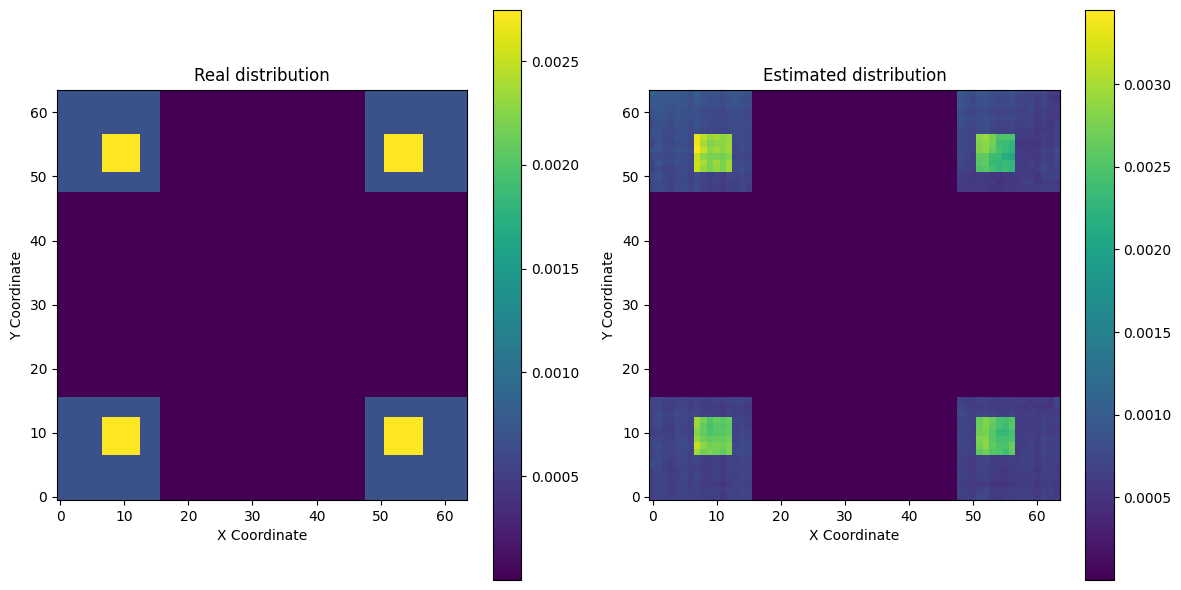

In [ ]:
print("L1 error:", l1_error(mainGFN_SAGFN.pf,env))
plot_distribution(mainGFN_SAGFN.pf,env)

## Train with LGGFN

In [ ]:
mainPF_LGGFN = MLP(input_dim=preprocessor.output_dim, output_dim=env.n_actions)
mainPB_LGGFN = MLP(
    input_dim=preprocessor.output_dim,
    output_dim=env.n_actions - 1,
    trunk=mainPF_LGGFN.trunk,
)



mainPF_estimator_LGGFN = DiscretePolicyEstimator(
    mainPF_LGGFN, env.n_actions, is_backward=False, preprocessor=preprocessor
)
mainPB_estimator_LGGFN = DiscretePolicyEstimator(
    mainPB_LGGFN, env.n_actions, is_backward=True, preprocessor=preprocessor
)

mainGFN_LGGFN = TBGFlowNetV2(pf=mainPF_estimator_LGGFN, pb=mainPB_estimator_LGGFN, logZ=0.)

auxPF_LGGFN = MLP(input_dim=preprocessor.output_dim, output_dim=env.n_actions)
auxPB_LGGFN = MLP(
    input_dim=preprocessor.output_dim,
    output_dim=env.n_actions - 1,
    trunk=auxPF_LGGFN.trunk,
)



auxPF_estimator_LGGFN = DiscretePolicyEstimator(
    auxPF_LGGFN, env.n_actions, is_backward=False, preprocessor=preprocessor
)
auxPB_estimator_LGGFN = DiscretePolicyEstimator(
    auxPB_LGGFN, env.n_actions, is_backward=True, preprocessor=preprocessor
)

auxGFN_LGGFN = TBGFlowNetV2(pf=auxPF_estimator_LGGFN, pb=auxPB_estimator_LGGFN, logZ=0.)


train_lggfn(
    env=env,
    mainGFN=mainGFN_LGGFN,
    auxGFN= auxGFN_LGGFN,
    batch_size=16,
    iterations=10000,
)

L1 error: 2.0552130707211523e-05


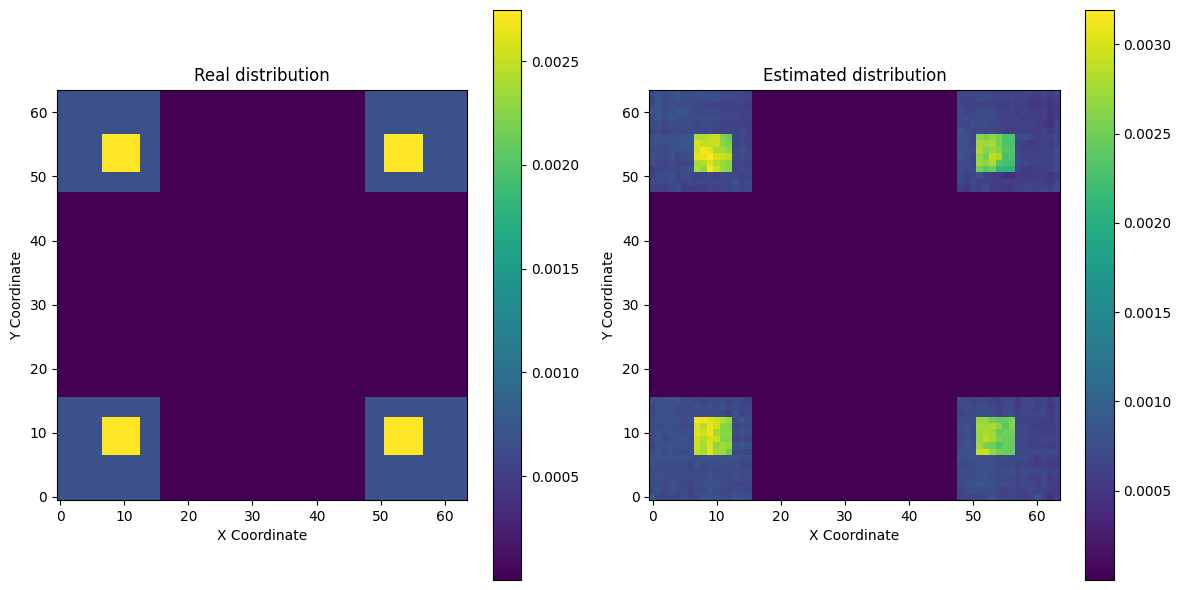

In [ ]:
print("L1 error:", l1_error(mainGFN_LGGFN.pf,env))
plot_distribution(mainGFN_LGGFN.pf,env)